In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage
from skimage import img_as_float
from skimage import img_as_ubyte
import skimage.data as data
import skimage.transform as transf

(425, 640)
816000


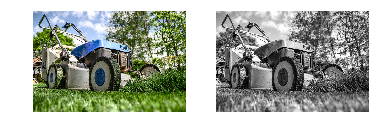

In [49]:
imagen= skimage.io.imread("img/yard.jpg", as_gray=False) #data.chelsea()
imgGris= skimage.io.imread("img/yard.jpg", as_gray=True) 
plt.subplot(121)
plt.imshow(imagen) #imagen original
plt.axis('off')

plt.subplot(122)
plt.imshow(imgGris,cmap=plt.cm.gray) #imagen en grises
plt.axis('off')

print(imgGris.shape) #longitud del array
print(imagen.size)

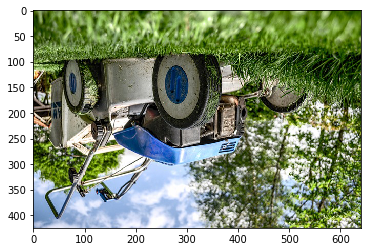

In [50]:
#invertir verticalmente
ainv=imagen[::-1] #refleja array [start:stop:step]
plt.imshow(ainv)

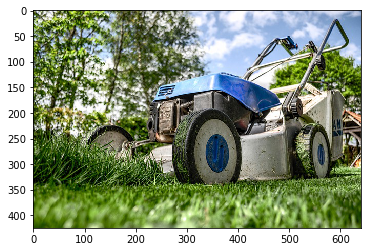

In [51]:
# invertir horizontalmente
binv=imagen[::1,::-1] #refleja array 
plt.imshow(binv)

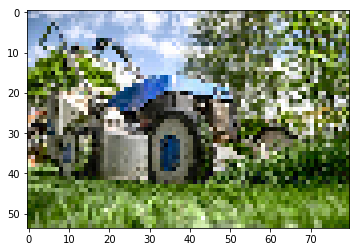

In [52]:
# Submuestrear
binv=imagen[::8,::8] #slice
plt.imshow(binv)

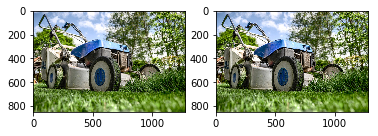

In [53]:
# Remuestrear

# remuestreo(imagen, escala, método de interpolación)
def remuestreo(img, escala, inter):
    fil,col,ch= img.shape
    # print(fil,col, ch)
    tform= transf.SimilarityTransform(scale=1/escala)
    salida=transf.warp(img,tform, order=inter, output_shape=([fil*escala,col*escala]))
    return salida;

# Próximo
plt.subplot(121)
plt.imshow(remuestreo(imagen,2,1))

# Bi-lineal
plt.subplot(122)
plt.imshow(remuestreo(imagen,2,0))

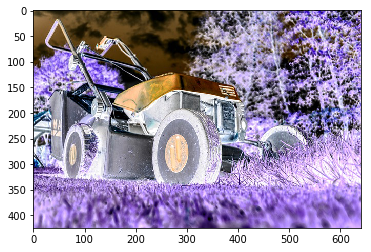

In [54]:
# Negativo
negativo=256-1- imagen[::1][::1]
plt.imshow(negativo)

[[0.17503575 0.18293076 0.19294967 ... 0.14692181 0.16291227 0.10940794]
 [0.17730615 0.18523631 0.19659629 ... 0.17544166 0.23350237 0.16380682]
 [0.18634664 0.19333493 0.20411221 ... 0.21029543 0.24533603 0.18032584]
 ...
 [0.11932719 0.12319179 0.12711395 ... 0.10402976 0.10651006 0.10916733]
 [0.1202519  0.12319179 0.12574922 ... 0.10153521 0.10536803 0.10935829]
 [0.11905214 0.12264151 0.12574922 ... 0.10288118 0.10422299 0.10422299]]


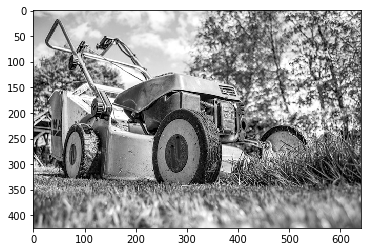

In [79]:
# Transformación logaritmica de una imagen
c=1
tlog= c*np.log10(1+imgGris, where=imgGris>0.0)
plt.imshow(tlog,cmap=plt.cm.gray)
print(tlog)


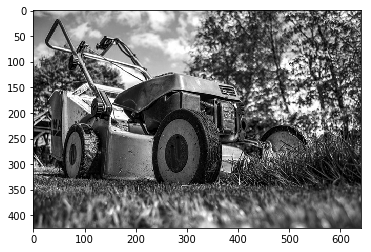

In [80]:
# Inversa logaritmica de una imagen
c=1
ilog=np.exp(imgGris/c)-1
plt.imshow(ilog, cmap=plt.cm.gray)

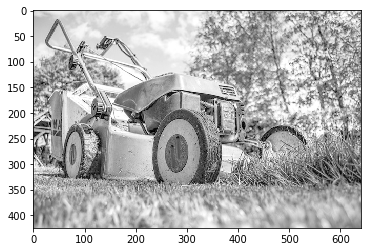

In [90]:
# Power Law
y=0.5
c=1
plaw=c*imgGris**y
plt.imshow(plaw,cmap=plt.cm.gray)

In [83]:
# Selector de bines
import ipywidgets as widgets

h=widgets.Dropdown(
    options=[256,128, 32,8],
    value=256,
    description='bines:',
    disabled=False,)
h

Dropdown(description='bines:', options=(256, 128, 32, 8), value=256)

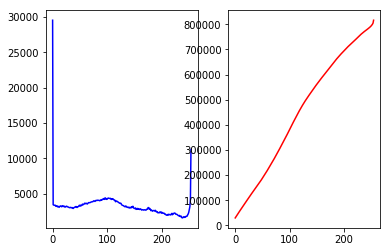

In [84]:
# graficar histograma
# hist[1] => [valores]
# hist[0] => [0,..,255]
hist, bins = np.histogram(imagen,bins=h.value) 
acumulada = np.cumsum(hist)
plt.subplot(121)
plt.plot(bins[:-1],hist,c='blue')
plt.subplot(122)
plt.plot(bins[:-1],acumulada,c='red')
plt.show()
